In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.rcParams['figure.figsize'] = [15,7.5]

In [3]:
data = scipy.io.loadmat('./YaleFaceDataBase/Yale_64x64.mat')

In [4]:
# Taking Last 15 images for testing

X_test = np.array(data['fea'])[150:,:]      

In [5]:
# Taking frist 149 images for training
X = np.array(data['fea'])[:150,:]

In [6]:
print(X.shape)

(150, 4096)


In [7]:
XtX = np.matmul(X.T,X)

In [8]:
print(XtX.shape)


(4096, 4096)


In [9]:
eigValues, eigVectors = np.linalg.eig(XtX)

In [10]:
print(eigValues.shape)

(4096,)


In [11]:
print(eigValues[4000:])

[ -95.87212583 -100.23644794 -127.99262187 -137.39960762 -132.10364213
  159.40355341  111.06792481  126.48589776 -198.88613088  -68.82417363
  -85.54853915  -74.81482552  170.06367595  -82.1587862   106.48448469
  151.7299468   150.42988325  144.50049669  134.09314361  139.77671115
  129.47823944  -61.97693222  -65.01130052 -156.48923597 -158.18961839
  -99.51909773 -146.39034163  -79.61817018 -154.08923022  -56.1070764
   44.47717395   51.92870949   88.11452636   74.7856489    68.77857824
   63.1354954  -147.58485533  156.98305335  138.48005272  103.5589881
   97.66886299   69.30765283   41.03277983   29.72187612   28.32743261
   35.11847552   93.82716803   81.51166916  -45.43461805   56.24648981
  -43.76273099  -51.18773687   -8.28296498   38.09557232  -38.79502026
  -24.1575199   -29.96183426  -26.71908105  -78.08851094  -12.79548755
   14.23275554    7.96137492    4.18964189    1.56106279   -1.27337026
   80.58561446   57.74038968   59.8311609   -52.34852263   16.27864825
   23.10

In [24]:
U,D,Vt = np.linalg.svd(X)

D = np.diag(D)

In [25]:
D.shape

(150, 150)

In [37]:
for i in range(len(D)):
    print(D[i][i],"     ")

81828.21319581696      
15702.547433865046      
13803.194778746494      
9058.557123907069      
8723.85467027247      
7599.094030773023      
6571.912701783803      
5951.8856940805645      
5450.5227821393355      
5208.564573349206      
5000.36213581675      
4582.244123026996      
4375.811569189551      
4150.8839200749935      
3870.611004974762      
3611.520741257069      
3471.5894299304987      
3417.253923495507      
3260.609469912566      
3218.925084484032      
3061.2815075290014      
2883.3968077330987      
2793.5567433129745      
2716.0410437460846      
2617.891623458018      
2587.284283813593      
2522.067919484296      
2451.9742065474225      
2392.101591354389      
2380.389474286114      
2329.7206666265506      
2267.6653831339772      
2171.111644959481      
2148.6833172562174      
2043.466528568081      
2000.0330234385988      
1964.2180048355267      
1941.4311658282281      
1886.529834611774      
1874.4878730218375      
1808.3247642989688      

In [26]:
U.shape

(150, 150)

In [27]:
Vt.shape

(4096, 4096)

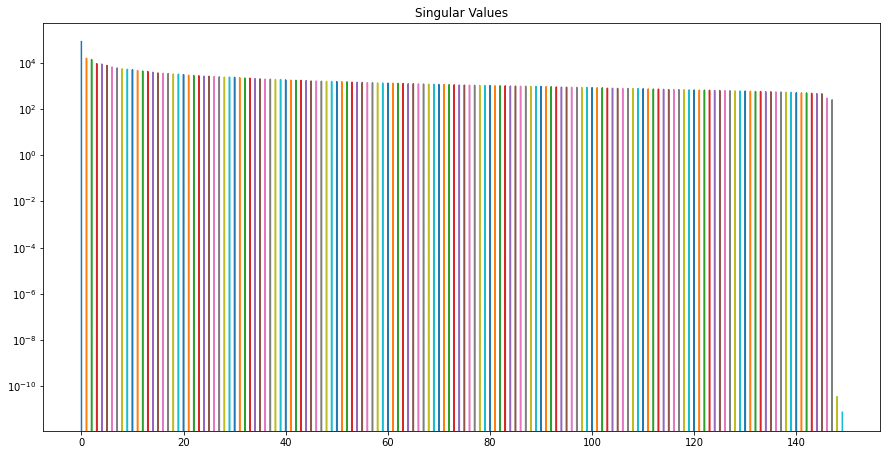

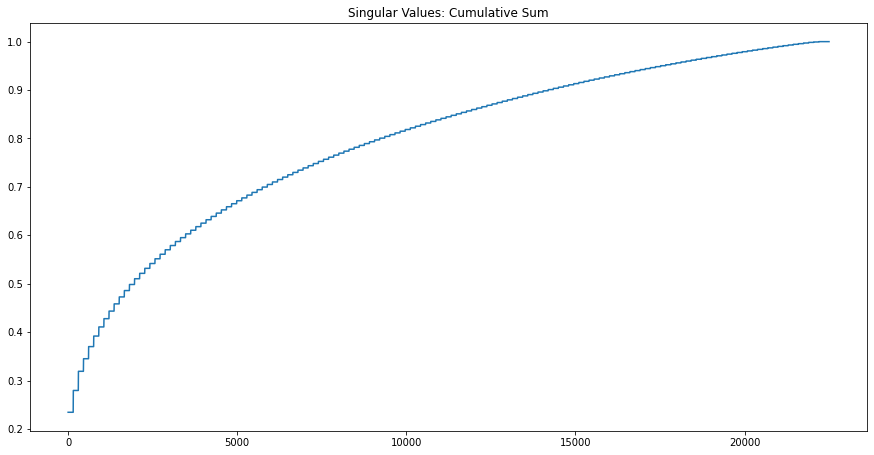

In [28]:
plt.figure(1)
plt.semilogy(D)
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(D)/np.sum(D))
plt.title('Singular Values: Cumulative Sum')
plt.show()

# Reconstruction of Training data

In [29]:
Xcap = (X.dot(Vt.T)).dot(Vt)

In [30]:
print(Xcap.shape)

(150, 4096)


[]

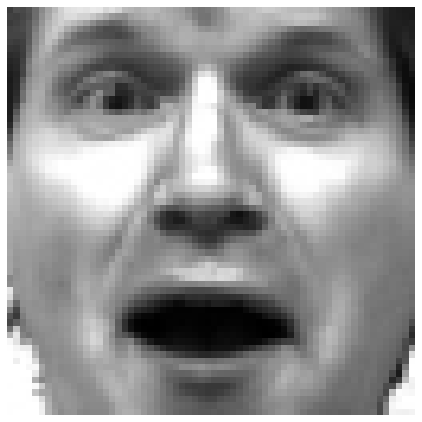

In [31]:
img = plt.imshow(Xcap[1,:].reshape(64,64).T.astype('uint8'))
img.set_cmap('gray')
plt.axis('off')
plt.plot()

# Reconstruction of Test Data
# xcap = X*V*(Σ^−2)*Vt*Xt*x

In [32]:
invD_sq = np.linalg.inv(np.matmul(D,D))

In [33]:
print(invD_sq)

[[1.49346092e-10 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.05564350e-09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.24856726e-09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.60920226e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.57274655e+20 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.70181565e+22]]


In [34]:
print(X.shape)
print(Vt.T.shape)
print(invD_sq.shape)
print(Vt.shape)
print(X.T.shape)
print(X_test.shape)

(150, 4096)
(4096, 4096)
(150, 150)
(4096, 4096)
(4096, 150)
(15, 4096)


In [35]:
UUt = np.matmul(X,np.matmul(Vt.T,np.matmul(invD_sq,np.matmul(Vt,X.T))))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4096 is different from 150)

In [46]:
y = np.matmul(UUt,x)

In [47]:
print(y.shape)

(4096, 15)


<ipython-input-48-b6c760e68f40>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  img = plt.imshow(y[:,14].reshape(64,64).astype('uint8').T)


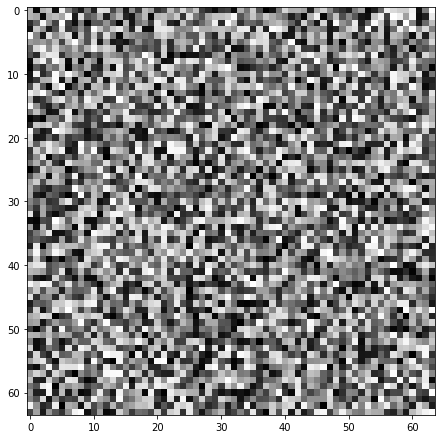

In [48]:
img = plt.imshow(y[:,14].reshape(64,64).astype('uint8').T)
img.set_cmap('gray')